## **Import Libraries**

In [1]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import warnings # ignore warnings messages

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Car_Evaluation_Balanced.csv")

In [4]:
def load_inputs_outupts():
    
    X=df.drop(["class"],axis="columns")
    y=df["class"]
    
    return X,y

In [5]:
X,y=load_inputs_outupts()

### **Split Data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train.shape[0],X_test.shape[0]

(3242, 1598)

### **Creation of Model**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf=DecisionTreeClassifier(max_depth=10,random_state=42)

In [11]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **Model Evaluation**

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [13]:
clf.score(X_train,Y_train)

0.9858112276372609

In [14]:
clf.score(X_test,Y_test)

0.9755944931163955

In [15]:
class Evaluete():
    
    def __init__(self):
        
        self.clf = clf
        self.y_pred=self.clf.predict(X_test)
        
    def Report(self):
        
        print(classification_report(y_true=Y_test,y_pred=self.y_pred,target_names=["unacc","acc","good","vgood"]))
        
    def ConfusionMatixPlot(self):
        
        cm_labels = ["unacc","acc","good","vgood"]
        cm_array = confusion_matrix(y_true=Y_test,y_pred=self.y_pred)
        cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
        
        
        fig,(ax) = plt.subplots(1,1,figsize=(10,8))
        
        ax.set_title("Confusion Matrix")
        _ = sns.heatmap(cm_array_df,annot=True,fmt="g",cmap="Greens")

    def CrossValidation(self):
        
        return cross_val_score(self.clf,X_test,Y_test,cv=10).mean()

In [16]:
modelEvaluation = Evaluete()

In [17]:
modelEvaluation.Report()

              precision    recall  f1-score   support

       unacc       0.98      0.99      0.98       425
         acc       0.97      0.97      0.97       395
        good       0.97      0.99      0.98       381
       vgood       0.98      0.96      0.97       397

    accuracy                           0.98      1598
   macro avg       0.98      0.98      0.98      1598
weighted avg       0.98      0.98      0.98      1598



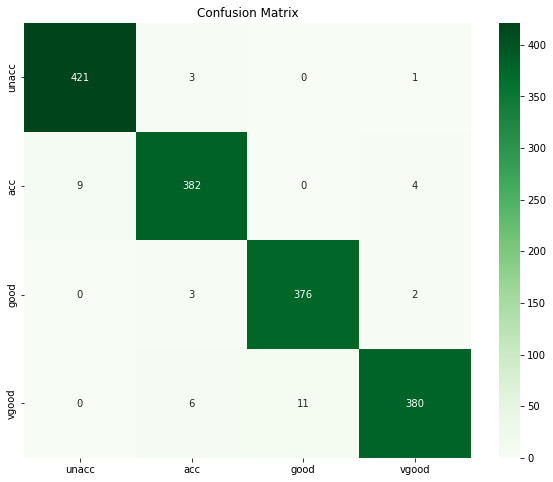

In [18]:
modelEvaluation.ConfusionMatixPlot()

In [19]:
modelEvaluation.CrossValidation()

0.9749685534591194

The model offers robust metrics. For each type of class. Therefore, it indicates that the model is capable of solving the problem.

### **Opening the Black Box..**

In [20]:
from sklearn.tree import plot_tree

In [21]:
feature_names = df.drop(["class"],axis="columns").columns
class_names = {0:'unacc',1:'acc',2:'good',3:'vgood'}

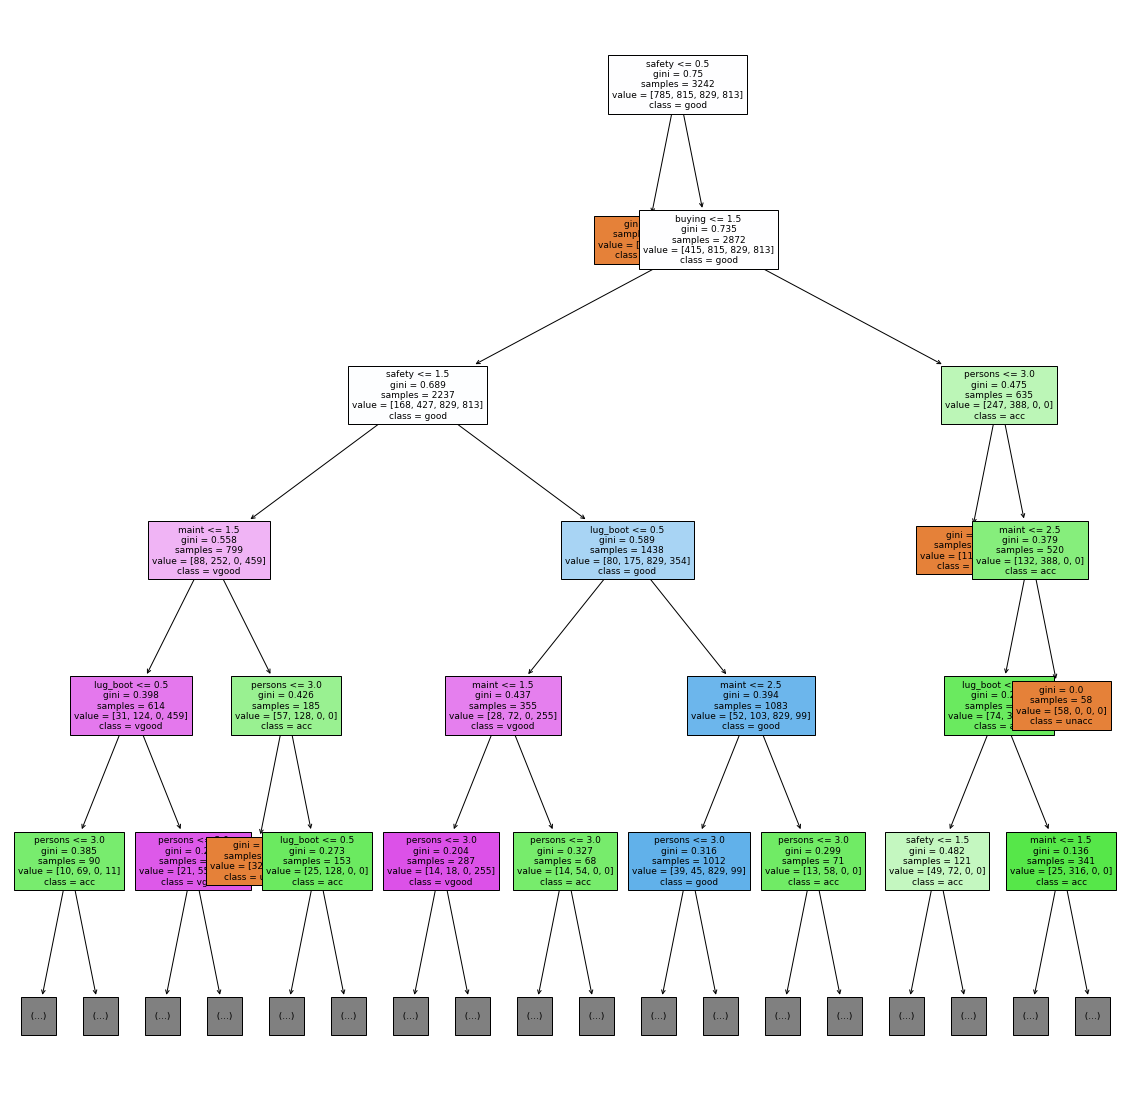

In [22]:
fig = plt.figure(figsize=(20,20))
_ = plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True,fontsize=9,max_depth=5)
plt.show()

We represent graphically the decision tree. With a maximum density of 5. For optimal presentation.

#### **Plot Importance**

In [23]:
import shap

In [24]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

In [25]:
def plot_importance():
    
    sns.set_style(style="whitegrid")
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    
    return plt.show()

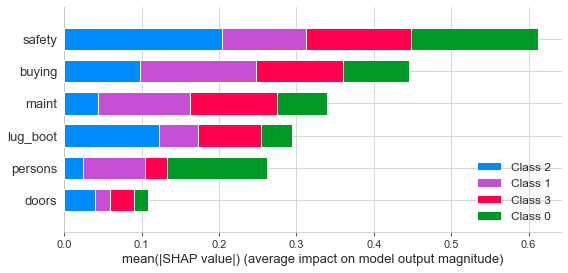

In [27]:
if __name__ == '__main__':
    
    plot_importance()

### **Most Important Features of the Model**

* The degree of **safety** is important. Because users want a safe vehicle with high protection against car accidents.

* The second most important characteristic is degree of **buying**. Since users are looking for a car with the best value for money.

* The third most important characteristic is the degree of **maint**. Since people consider the possible expense in the future. Especially with the refections and some vehicle fluids

#### **Save Model**

In [28]:
import joblib

In [29]:
joblib.dump(clf,"car_evaluation_model.pkl")

['car_evaluation_model.pkl']